# Econ 441B Week 10 Assignment
# Richard Grigorian (UID: 505-088-797)

## 0. Import and Clean Data.

In [2]:
# Imports
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
# Load Data
df = pd.read_csv("Country-data.csv", sep = ",")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
# Clean Data
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [7]:
# Scale Data
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## 1. Run a PCA Algorithm to get 2 Principle Components for the 9 X features.

In [8]:
# Initialize PCA Model
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [9]:
# Observe PCA Values
X_pca

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

## 2. Plot a Scatter plot of the PCs on the axis.

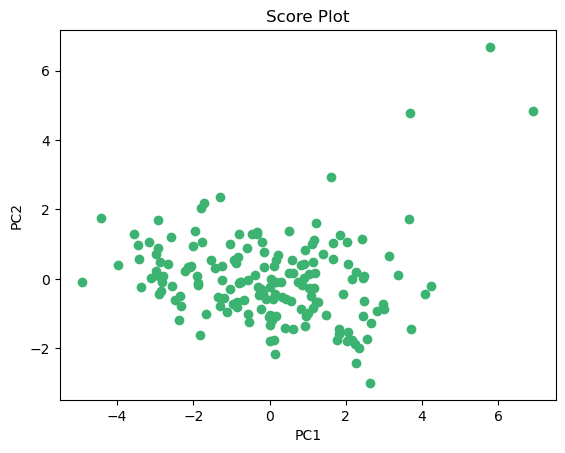

In [12]:
# Plotting
plt.figure()
plt.scatter(
    x = X_pca[:, 0], #PC1
    y = X_pca[:, 1], #PC2
    c = 'mediumseagreen'
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Score Plot")
plt.show()

## 3. Rank the features in order of importance according to PCA.

In [13]:
# Get PCA Componenets
loadings = pca.components_

In [14]:
# Feature Importances
loadings

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [15]:
# Importance Across Components
np.sum(loadings**2, axis = 0)

array([0.21320078, 0.45656697, 0.08184323, 0.47741956, 0.15926317,
       0.03738641, 0.23093748, 0.18709439, 0.15628802])

In [31]:
# Feature Names
feature_names = df.columns[1:]

# Feature Importance Storage
feature_importance = pd.DataFrame(np.sum(loadings**2, axis = 0))

# Re-Index & Rank Order
feature_importance.index = feature_names
feature_importance.rename(
    columns={0: "Importance"}).sort_values(
    "Importance", ascending = False)

,Importance
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


## 4. Plot a heatmap of the feature importance.

In [32]:
# Get Feature Names
feature_names = df.columns[1:]

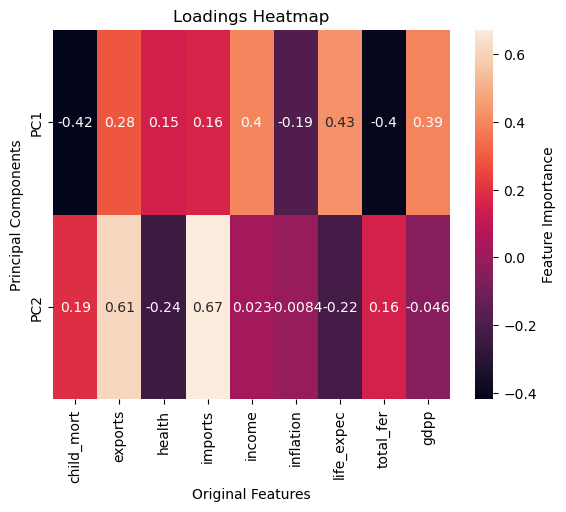

In [37]:
# Heatmap
plt.figure()
sns.heatmap(loadings,
 annot = True,
  xticklabels = feature_names,
  yticklabels = ["PC1", "PC2"],
  cbar_kws = {'label': 'Feature Importance'}
  )
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

## 5. Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

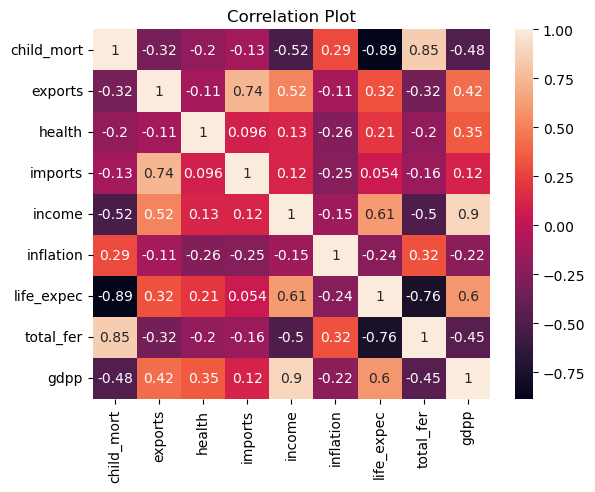

In [36]:
# Correlation Plot
plt.figure()
sns.heatmap(X.corr(), annot = True)
plt.title("Correlation Plot")
plt.plot()

#### Comment

Features that have similar importance tend to be highly correlated. PCA was invented to remove correlated variables. Hence, 2 high correlated variables will have high similar values in the Principle Component.

For example, Import and Exports are highly correlated (0.74) and both have importances of approximately 0.6.

## 6. Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [38]:
# Initialize PCA
pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_scaled)

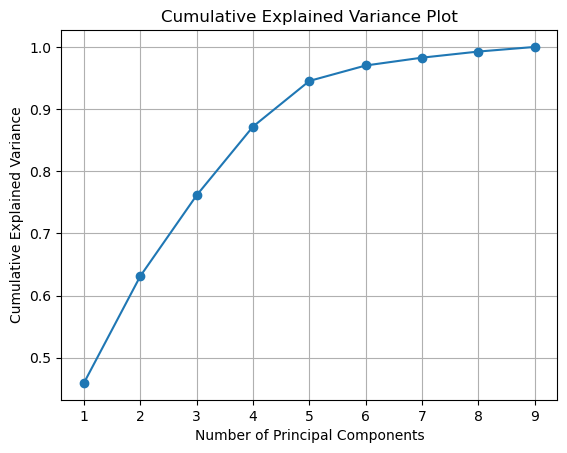

In [39]:
# Get Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting
plt.figure()
plt.plot(
    np.arange(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance, 
    marker='o'
)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [40]:
# Check the ratios
np.cumsum(pca.explained_variance_ratio_)

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

While the graph makes it seem that we only need 5 PCs, if we look at the actual values, we see that 5 PCs only retains 94.5% of the variance. **8To retain at least 95%,we need 6 PCs.**